In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
import re

In [7]:
df = pd.read_csv('imdb_movies.csv')
pairs = {}
for i in range(len(df)):
    # actors = df.at[i, 'Actors'].split(',')
    actors = re.split(r' *, *', df.at[i, 'Actors'])
    for item in actors:
        actor = item.strip()
        if pairs.get(actor, None) != None:
            # pairs[actor] |= set(df.at[i, 'Genre'].split(','))
            pairs[actor] |= set(re.split(r' *, *', df.at[i, 'Genre']))
        else:
            # pairs[actor] = set(df.at[i, 'Genre'].split(','))
            pairs[actor] = set(re.split(r' *, *', df.at[i, 'Genre']))

pairs = sorted(list(pairs.items()), key=lambda item: item[0])
index = [item[0] for item in pairs]
data = [item[1] for item in pairs]
df1 = pd.DataFrame({'演员': index, '类型': data})

df1

,演员,类型
0,50 Cent,"{Action, Mystery, Crime}"
1,A.C. Peterson,"{Action, Horror}"
2,AJ Michalka,"{Sci-Fi, Mystery, Thriller}"
3,Aamir Khan,"{Drama, Music, Biography, Action, Family, Roma..."
4,Aaron Burns,"{Drama, Adventure, Horror, Thriller}"
...,...,...
1980,Zoë Bell,"{Action, Thriller, Horror}"
1981,Zoë Kravitz,"{Sci-Fi, Drama, Adventure, Action, Thriller, C..."
1982,Émilie Leclerc,"{Adventure, Crime, Biography}"
1983,Ólafur Darri Ólafsson,"{Adventure, Action, Fantasy}"


In [8]:
df1['数量'] = df1['类型'].apply(lambda x: len(x))
df1.sort_values('数量', ascending=False)

,演员,类型,数量
253,Brad Pitt,"{History, Sport, Romance, Action, Adventure, H...",14
95,Amy Adams,"{Mystery, Romance, Adventure, Sci-Fi, Comedy, ...",13
738,Hugh Jackman,"{Mystery, Musical, Romance, Adventure, Sci-Fi,...",13
353,Chloë Grace Moretz,"{Mystery, Romance, Music, Adventure, Horror, S...",13
1712,Scarlett Johansson,"{History, Mystery, Romance, Adventure, Horror,...",13
...,...,...,...
1745,Shariff Earp,{Drama},1
638,Florence Pugh,{Drama},1
635,Fionn O'Shea,{Drama},1
634,Fiona Gordon,{Comedy},1


In [9]:
result = df1['数量'].max()
result

14

In [10]:
ans = df1[df1['数量']>=result-1]
ans

,演员,类型,数量
95,Amy Adams,"{Mystery, Romance, Adventure, Sci-Fi, Comedy, ...",13
253,Brad Pitt,"{History, Sport, Romance, Action, Adventure, H...",14
353,Chloë Grace Moretz,"{Mystery, Romance, Music, Adventure, Horror, S...",13
738,Hugh Jackman,"{Mystery, Musical, Romance, Adventure, Sci-Fi,...",13
953,Johnny Depp,"{Musical, Mystery, Romance, Adventure, Horror,...",13
1712,Scarlett Johansson,"{History, Mystery, Romance, Adventure, Horror,...",13


<Figure size 432x288 with 0 Axes>

C:\Users\linter\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 235 (\N{LATIN SMALL LETTER E WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


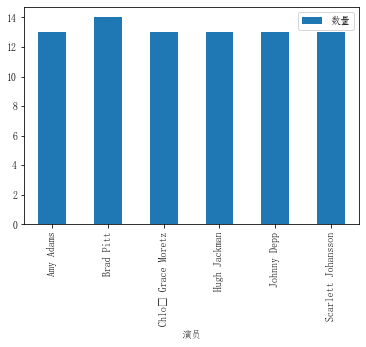

In [11]:
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
plt.figure()
ans.plot(x='演员',y='数量',kind='bar')
plt.show()